### Особенность данных - для устройств Android наблюдаем более высокие юзерские отмены.
### Гипотеза - Если UI приложения Android сделать похожим на приложение IOS, то это повысит конверсию в поездку на 3%.

In [42]:
# Загрузка данных

import pandas as pd

df = pd.read_csv(r'C:\Users\AAA\Desktop\new_dataframe.csv')

df.head(5)

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
0,0,867689,12,iOS,business,no surge,1,1,1,1,0,0,7.982135,20,low
1,1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low


In [94]:
# Фильтрация по OS

df_android = df[df['os'] == 'Android']

# Удаление строк, где значение в столбце 'distance' является null
df_android = df_android.dropna(subset=['distance'])
df_android = df_android.dropna(subset=['age'])

df_android.head(5)

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
1,1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low
7,7,682337,2,Android,comfort,no surge,1,1,1,1,0,1,9.055344,21,low


In [96]:
# Распределение по группам случайным образом

group_a = df_android.sample(frac=0.5, random_state=42)  # Группа A (50% случайно выбранных строк)
group_b = df_android.drop(group_a.index)  # Группа B (оставшиеся строки)


print("Группа A:")
print(group_a)
print("\nГруппа B:")
print(group_b)

Группа A:
       Unnamed: 0  user_id  hour       os order_class     surge  app_opened  \
36009       36009   688333     9  Android     economy     surge           1   
6728         6728   597354    21  Android     comfort     surge           1   
52200       52200   959970     6  Android     comfort  no surge           1   
28198       28198   472573     8  Android     economy     surge           1   
62580       62580   993247    11  Android     comfort     surge           1   
...           ...      ...   ...      ...         ...       ...         ...   
95364       95364   756931    13  Android     economy     surge           1   
44898       44898   342389    13  Android     economy  no surge           1   
94092       94092   335817    17  Android     economy  no surge           1   
16636       16636   785075    21  Android     comfort     surge           1   
53066       53066   933629     3  Android     comfort  no surge           1   

       price_seen  order_made  ride_compl

C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


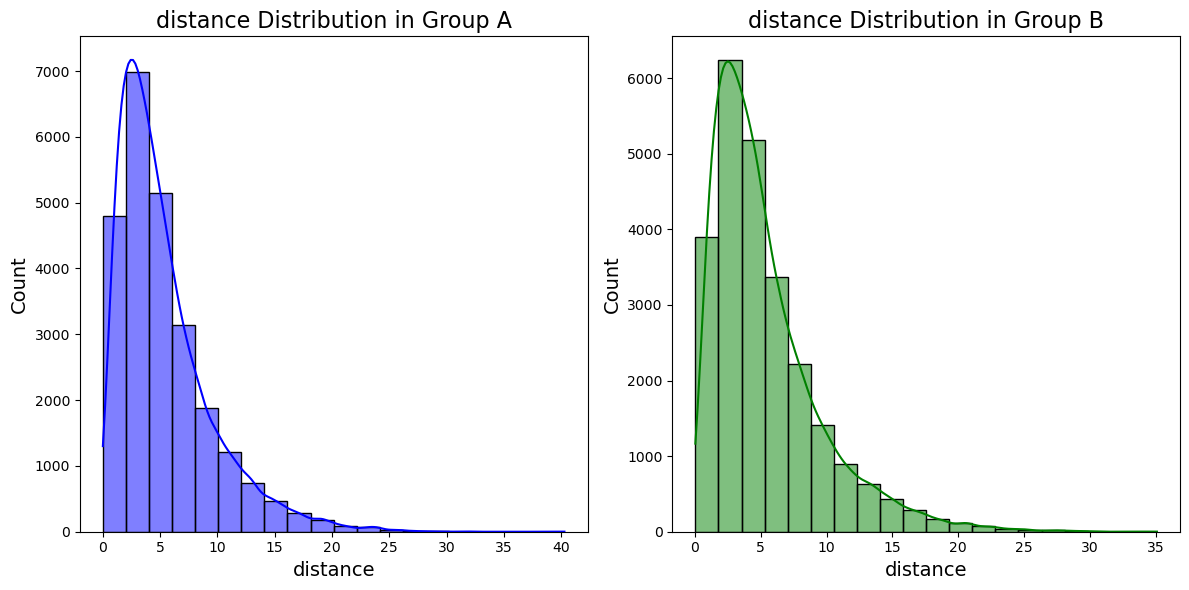

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# График распределения для группы A
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Два графика в одной строке
sns.histplot(group_a['distance'], kde=True, color='blue', bins=20)
plt.title('distance Distribution in Group A', fontsize=16)
plt.xlabel('distance', fontsize=14)
plt.ylabel('Count', fontsize=14)

# График распределения для группы B
plt.subplot(1, 2, 2)
sns.histplot(group_b['distance'], kde=True, color='green', bins=20)
plt.title('distance Distribution in Group B', fontsize=16)
plt.xlabel('distance', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.tight_layout()
plt.show()

In [102]:
# Т.к. распределения логонормальные, t-тест не подходит. Проведем тест Манна-Уитни для сравнения групп.

from scipy.stats import mannwhitneyu

stat, p_val = mannwhitneyu(group_a['distance'], group_b['distance'])
print(f"Mann-Whitney U test: p-value = {p_val}")

Mann-Whitney U test: p-value = 0.6436223449415783


### Значение p-value = 0.64 гораздо больше стандартных значений, например 0,05. Можно сказать, что выборки не имеют статистически значимых различий.

### Также проверим столбец Age.

C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


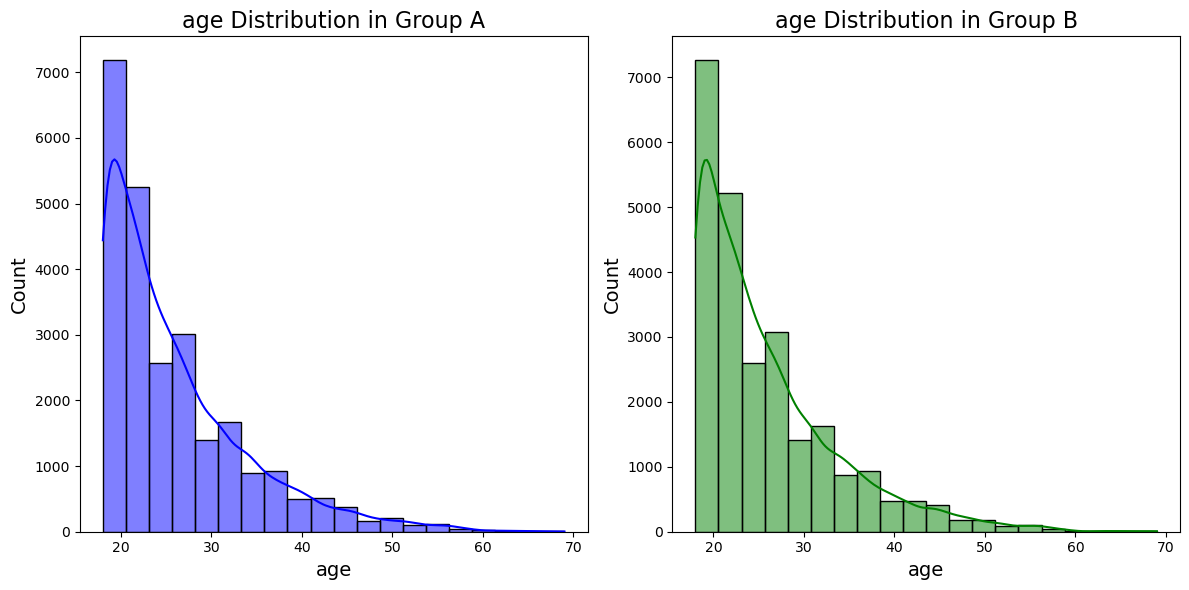

In [104]:
# График распределения для группы A
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Два графика в одной строке
sns.histplot(group_a['age'], kde=True, color='blue', bins=20)
plt.title('age Distribution in Group A', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# График распределения для группы B
plt.subplot(1, 2, 2)
sns.histplot(group_b['age'], kde=True, color='green', bins=20)
plt.title('age Distribution in Group B', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.tight_layout()
plt.show()

In [106]:
# Т.к. распределения логонормальные, t-тест не подходит. Проведем тест Манна-Уитни для сравнения групп.

stat, p_val = mannwhitneyu(group_a['age'], group_b['age'])
print(f"Mann-Whitney U test: p-value = {p_val}")

Mann-Whitney U test: p-value = 0.3316805675715322


### Можно сделать вывод, что группы достаточно однородны.

###

### Особенность данных - Если классы Comfort или Business, то юзерские отмены более низкие и более длинные поездки.
### Гипотеза - Если внедрить тариф "Попутчики" для класса Economy, это может снизить стоимость поездки, а значит повысить конверсию в поездки.

In [110]:
# Фильтрация по order_class

df_economy = df[df['order_class'] == 'economy']

# Удаление строк, где значение в столбце 'order_class' является null
df_economy = df_android.dropna(subset=['distance'])
df_economy = df_android.dropna(subset=['age'])

df_economy.head(5)

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
1,1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low
7,7,682337,2,Android,comfort,no surge,1,1,1,1,0,1,9.055344,21,low


In [142]:
# Распределение по группам случайным образом

group_a2 = df_economy.sample(frac=0.5, random_state=30)  # Группа A (50% случайно выбранных строк)
group_b2 = df_economy.drop(group_a2.index)  # Группа B (оставшиеся строки)


print("Группа A:")
print(group_a2)
print("\nГруппа B:")
print(group_b2)

Группа A:
       Unnamed: 0  user_id  hour       os order_class     surge  app_opened  \
14335       14335   674230    13  Android     comfort  no surge           1   
31160       31160   832202     9  Android     economy     surge           1   
29845       29845   947091     8  Android     economy     surge           1   
32237       32237   551203     7  Android     economy     surge           1   
67860       67860   704491    23  Android     economy  no surge           1   
...           ...      ...   ...      ...         ...       ...         ...   
17150       17150   908609    14  Android     comfort  no surge           1   
86295       86295   764983     3  Android    business  no surge           1   
32719       32719   128447     7  Android     economy     surge           1   
884           884   102243     7  Android     comfort     surge           1   
12033       12033   927507    13  Android     economy  no surge           1   

       price_seen  order_made  ride_compl

C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


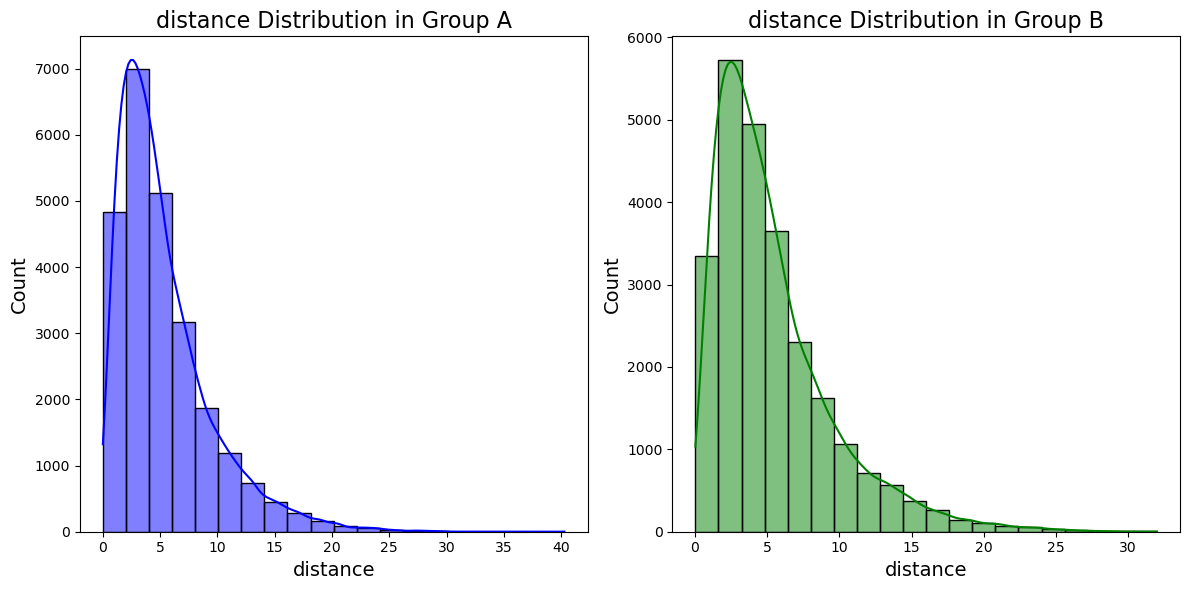

In [148]:
# График распределения для группы A
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Два графика в одной строке
sns.histplot(group_a2['distance'], kde=True, color='blue', bins=20)
plt.title('distance Distribution in Group A', fontsize=16)
plt.xlabel('distance', fontsize=14)
plt.ylabel('Count', fontsize=14)

# График распределения для группы B
plt.subplot(1, 2, 2)
sns.histplot(group_b2['distance'], kde=True, color='green', bins=20)
plt.title('distance Distribution in Group B', fontsize=16)
plt.xlabel('distance', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.tight_layout()
plt.show()

In [144]:
# Проведем тест Манна-Уитни для сравнения групп.

stat, p_val = mannwhitneyu(group_a2['distance'], group_b2['distance'])
print(f"Mann-Whitney U test: p-value = {p_val}")

Mann-Whitney U test: p-value = 0.6602815804554893


C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


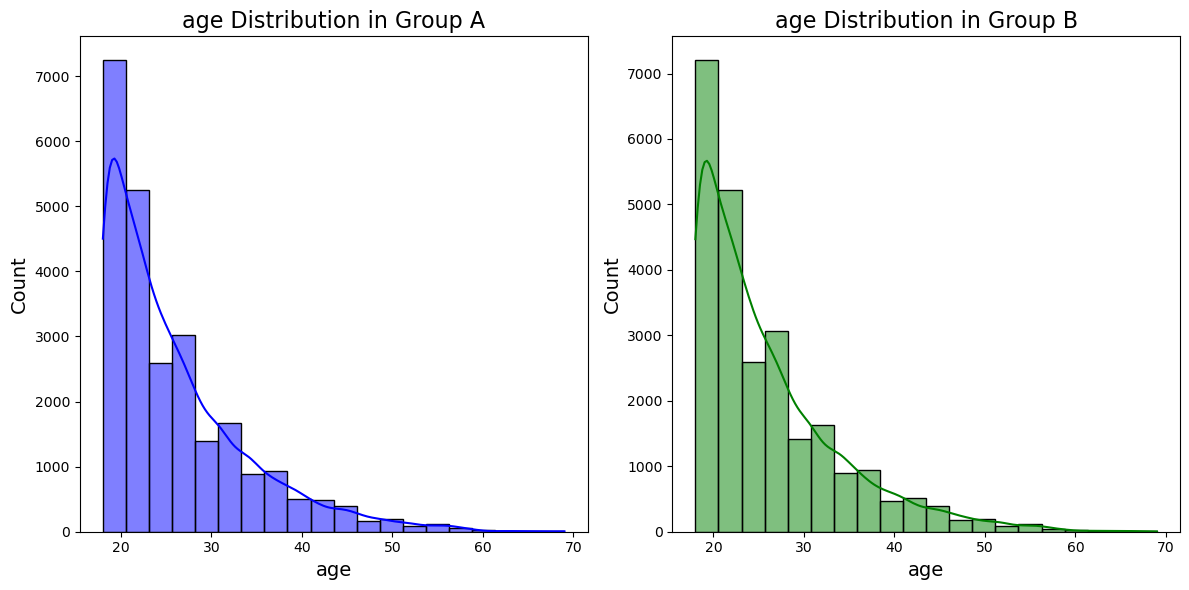

In [150]:
# График распределения для группы A
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Два графика в одной строке
sns.histplot(group_a2['age'], kde=True, color='blue', bins=20)
plt.title('age Distribution in Group A', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# График распределения для группы B
plt.subplot(1, 2, 2)
sns.histplot(group_b2['age'], kde=True, color='green', bins=20)
plt.title('age Distribution in Group B', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.tight_layout()
plt.show()

In [146]:
# Проведем тест Манна-Уитни для сравнения групп.

stat, p_val = mannwhitneyu(group_a2['age'], group_b2['age'])
print(f"Mann-Whitney U test: p-value = {p_val}")

Mann-Whitney U test: p-value = 0.5862242718630325


### Можно сделать вывод, что группы достаточно однородны.